In [2]:
import matplotlib.pyplot as plt
import numpy as np
from read_dat import *
from scipy.optimize import curve_fit

def gaussian(x, mu, sigma, A):
    return (A*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/2)*((x-mu)/sigma)**2))

In [3]:
calibration = [0.00007280833261560682, 0.02366570282243352]

In [3]:
start = -80
long = 400
short = 10

dat_file = read_dat('EJ276_50x50_Data/AmBe.dat', align_method='CFD', t_start=start, t_long=long, t_short=short, calibration_m=calibration[0], calibration_c=calibration[1])

init complete


In [4]:
ev = dat_file.read_event()

trace = ev[0].get_trace()

times = ev[0].get_times()

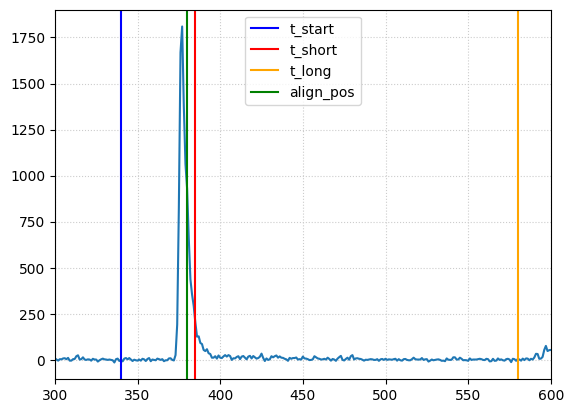

In [5]:
plt.figure()

plt.plot(trace)
plt.axvline(times[0], label='t_start', color='b')
plt.axvline(times[1], label='t_short', color='r')
plt.axvline(times[2], label='t_long', color='orange')
plt.axvline(times[3], label='align_pos', color='green')

plt.legend()
plt.xlim(300, 600)
plt.grid(color='#CCCCCC', linestyle=':')
plt.show()

In [4]:
short_tests = [5, 10, 15, 20, 30, 40]
long_tests = [100, 200, 300, 400, 500, 600]


In [28]:


for i in short_tests:
    dat_file.lst_out(50000, ch=[0], output=[[1,1,0,0,0]], filename=f'EJ276_50x50_Data/AmBe_Test_out_{i}.csv', integrals=[-80, i, 400])

for j in long_tests:
    dat_file.lst_out(50000, ch=[0], output=[[1,1,0,0,0]], filename=f'EJ276_50x50_Data/AmBe_Test_out_{j}.csv', integrals=[-80, 10, j])



1000 events
2000 events
3000 events
4000 events
5000 events
6000 events
7000 events
8000 events
9000 events
10000 events
11000 events
12000 events
13000 events
14000 events
15000 events
16000 events
17000 events
18000 events
19000 events
20000 events
21000 events
22000 events
23000 events
24000 events
25000 events
26000 events
27000 events
28000 events
29000 events
30000 events
31000 events
32000 events
33000 events
34000 events
35000 events
36000 events
37000 events
38000 events
39000 events
40000 events
41000 events
42000 events
43000 events
44000 events
45000 events
46000 events
47000 events
48000 events
49000 events
50000 events
End reading
1000 events
2000 events
3000 events
4000 events
5000 events
6000 events
7000 events
8000 events
9000 events
10000 events
11000 events
12000 events
12000 events
13000 events
14000 events
15000 events
16000 events
17000 events
18000 events
19000 events
20000 events
21000 events
22000 events
23000 events
24000 events
25000 events
26000 events
27000

In [5]:
%matplotlib tk

for i in long_tests:
    file = open(f'./EJ276_50x50_Data/AmBe_Test_out_{i}.csv', 'r')

    reader = csv.reader(file)

    head = next(reader, None)
    print(head)
    head = next(reader, None)
    print(head)

    L = []
    S = []

    for row in reader:
        L.append(float(row[0]))
        S.append(float(row[1]))

    L = np.array(L)
    S = np.array(S)

    dat_file.add_selections(L, S, mode='m', lims=[[0,8], [0,1.2]])


for j in long_tests:
    file = open(f'./EJ276_50x50_Data/AmBe_Test_out_{j}.csv', 'r')

    reader = csv.reader(file)

    head = next(reader, None)
    print(head)
    head = next(reader, None)
    print(head)

    L = []
    S = []

    for row in reader:
        L.append(float(row[0]))
        S.append(float(row[1]))

    L = np.array(L)
    S = np.array(S)

    dat_file.add_selections(L, S, mode='m', lims=[[0,8], [0,1.2]])


['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
Begin selection for cut 1
1.0887096774193545 0.7699330972058244
2.0026881720430105 0.7841007477371112
3.6088709677419346 0.7872491145218417
5.551075268817204 0.7982683982683981
7.9502688172043 0.8061393152302242
7.936827956989246 0.008028335301062589
0.06048387096774177 0.014325068870523427
0.04704301075268802 0.5511216056670601
0.14784946236559127 0.6597402597402596
0.221774193548387 0.7164108618654073
0.389784946236559 0.7415977961432506
0.7526881720430105 0.7589138134592679
0.9946236559139785 0.7683589138134591
End selection
Selections outputted to file: EJ276_50x50_Data/AmBe_cuts.csv
Polygons Created
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
Begin selection for cut 2
0.16129032258064502 0.6754820936639118
0.38306451612903203 0.7400236127508854
0.8266129032258065 0.7715072805981895
1.5927419354838706 0.782526564344746
2.8494623655913975 0.7872491145218417
4.29435

In [6]:
from FoM import FoM

In [25]:
short_FoMs = []
long_FoMs = []

for count, len in enumerate(short_tests):
    file = open(f'./EJ276_50x50_Data/AmBe_Test_out_{len}.csv', 'r')

    reader = csv.reader(file)

    head = next(reader, None)
    print(head)
    head = next(reader, None)
    print(head)

    L = []
    S = []

    for row in reader:
        L.append(float(row[0]))
        S.append(float(row[1]))

    L = np.array(L)
    S = np.array(S)

    neutron_L, neutron_S = dat_file.select_events(L, S, cut_id=[count], inc=[1])
    gamma_L, gamma_S = dat_file.select_events(L, S, cut_id=[count], inc=[-1])

    FoMs, FoM_edges = FoM(L, S, neutron_L, neutron_S, gamma_L, gamma_S, 0.2, 200, 4)

    short_FoMs.append([FoMs, FoM_edges])

for count, len in enumerate(long_tests):
    file = open(f'./EJ276_50x50_Data/AmBe_Test_out_{len}.csv', 'r')

    reader = csv.reader(file)

    head = next(reader, None)
    print(head)
    head = next(reader, None)
    print(head)

    L = []
    S = []

    for row in reader:
        L.append(float(row[0]))
        S.append(float(row[1]))

    L = np.array(L)
    S = np.array(S)

    neutron_L, neutron_S = dat_file.select_events(L, S, cut_id=[count+6], inc=[1])
    gamma_L, gamma_S = dat_file.select_events(L, S, cut_id=[count+6], inc=[-1])

    FoMs, FoM_edges = FoM(L, S, neutron_L, neutron_S, gamma_L, gamma_S, 0.2, 200, 4)

    long_FoMs.append([FoMs, FoM_edges])


['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']
['EJ276_50x50_Data/AmBe channel 0, 50000 events, cuts False']
['L [ch]', 'S[ch]']


In [26]:
plt.figure()

plt.scatter(short_FoMs[0][1][:-1], short_FoMs[0][0], label='0')
plt.scatter(short_FoMs[1][1][:-1], short_FoMs[1][0], label='1')
plt.scatter(short_FoMs[2][1][:-1], short_FoMs[2][0], label='2')
plt.scatter(short_FoMs[3][1][:-1], short_FoMs[3][0], label='3')
plt.scatter(short_FoMs[4][1][:-1], short_FoMs[4][0], label='4')
plt.scatter(short_FoMs[5][1][:-1], short_FoMs[5][0], label='5')

plt.xlabel('')
plt.ylabel('')
plt.yscale('log')

plt.title('')
plt.legend()
plt.grid(color='#CCCCCC', linestyle=':')
plt.show()

In [27]:
plt.figure()

plt.scatter(long_FoMs[0][1][:-1], long_FoMs[0][0], label='0')
plt.scatter(long_FoMs[1][1][:-1], long_FoMs[1][0], label='1')
plt.scatter(long_FoMs[2][1][:-1], long_FoMs[2][0], label='2')
plt.scatter(long_FoMs[3][1][:-1], long_FoMs[3][0], label='3')
plt.scatter(long_FoMs[4][1][:-1], long_FoMs[4][0], label='4')
plt.scatter(long_FoMs[5][1][:-1], long_FoMs[5][0], label='5')

plt.xlabel('')
plt.ylabel('')
plt.yscale('log')

plt.title('')
plt.legend()
plt.grid(color='#CCCCCC', linestyle=':')
plt.show()

In [4]:
dat_file.lst_out(100000, ch=[0], output=[[1,1,0,0,0]], filename=f'EJ276_50x50_Data/AmBe_out_for_cuts.csv')

1000 events
1000 events
2000 events
3000 events
4000 events
5000 events
6000 events
7000 events
8000 events
9000 events
10000 events
11000 events
12000 events
13000 events
14000 events
15000 events
16000 events
17000 events
18000 events
19000 events
20000 events
21000 events
22000 events
23000 events
24000 events
25000 events
26000 events
27000 events
28000 events
29000 events
30000 events
31000 events
32000 events
33000 events
34000 events
35000 events
36000 events
37000 events
38000 events
39000 events
40000 events
41000 events
42000 events
43000 events
44000 events
45000 events
46000 events
47000 events
48000 events
49000 events
50000 events
51000 events
52000 events
53000 events
54000 events
55000 events
56000 events
57000 events
58000 events
59000 events
60000 events
61000 events
62000 events
63000 events
64000 events
65000 events
66000 events
67000 events
68000 events
69000 events
70000 events
71000 events
72000 events
73000 events
73000 events
74000 events
75000 events
76000 eve

In [5]:
file = open(f'./EJ276_50x50_Data/AmBe_out_for_cuts.csv', 'r')

reader = csv.reader(file)

head = next(reader, None)
print(head)
head = next(reader, None)
print(head)

L = []
S = []

for row in reader:
    L.append(float(row[0]))
    S.append(float(row[1]))

L = np.array(L)
S = np.array(S)

['EJ276_50x50_Data/AmBe channel 0, 100000 events, cuts False']
['L [ch]', 'S[ch]']


In [4]:
# %matplotlib tk
# dat_file.add_selections(L, S, mode='m', lims=[[0,8], [0,1.2]])
dat_file.add_selections(mode='p', file='./EJ276_50x50_Data/AmBe_cuts.csv')

Selections Imported
Polygons Created


In [5]:
dat_file.lst_out(False, output=[[1,1,0,0,0]], cuts=[0], inc=[-1], filename='AmBe_gamma_out.csv')

1000 events
1000 events
1000 events
2000 events
2000 events
3000 events
3000 events
4000 events
4000 events
4000 events
4000 events
4000 events
4000 events
5000 events
5000 events
6000 events
7000 events
8000 events
9000 events
10000 events
11000 events
12000 events
12000 events
12000 events
13000 events
13000 events
13000 events
13000 events
14000 events
14000 events
15000 events
16000 events
17000 events
18000 events
18000 events
19000 events
20000 events
21000 events
22000 events
23000 events
24000 events
24000 events
24000 events
25000 events
26000 events
27000 events
28000 events
29000 events
30000 events
30000 events
31000 events
32000 events
32000 events
33000 events
33000 events
34000 events
35000 events
36000 events
37000 events
37000 events
38000 events
38000 events
38000 events
38000 events
38000 events
38000 events
39000 events
40000 events
40000 events
40000 events
41000 events
41000 events
41000 events
42000 events
43000 events
43000 events
44000 events
45000 events
45000

In [4]:
file = open(f'AmBe_neutron_out.csv', 'r')

reader = csv.reader(file)

head = next(reader, None)
print(head)
head = next(reader, None)
print(head)

neutron_L = []
neutron_S = []

for row in reader:
    neutron_L.append(float(row[0]))
    neutron_S.append(float(row[1]))

neutron_L = np.array(neutron_L)
neutron_S = np.array(neutron_S)

['EJ276_50x50_Data/AmBe channel 0, False events, cuts [0]']
['L [ch]', 'S[ch]']


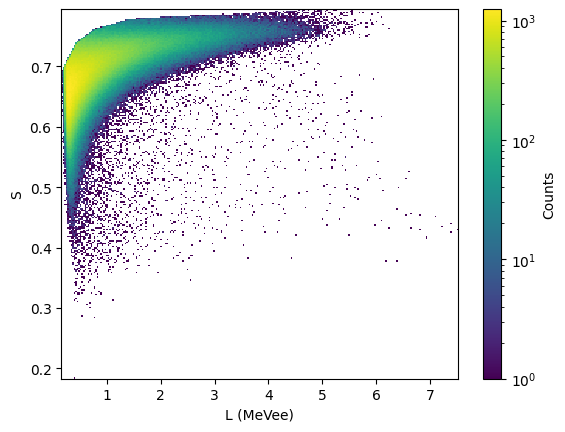

In [6]:
plt.hist2d(neutron_L, neutron_S, [256,256], norm=colors.LogNorm(vmin=1))
plt.xlabel('L (MeVee)')
plt.ylabel('S')
plt.colorbar(label='Counts')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


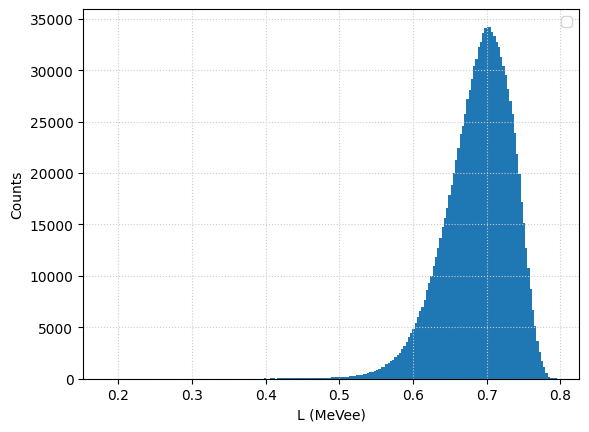

In [9]:
plt.figure()

plt.hist(neutron_S, bins=200)

plt.xlabel('L (MeVee)')
plt.ylabel('Counts')
# plt.yscale('log')

plt.title('')
plt.legend()
plt.grid(color='#CCCCCC', linestyle=':')
plt.show()

In [10]:
file = open(f'AmBe_gamma_out.csv', 'r')

reader = csv.reader(file)

head = next(reader, None)
print(head)
head = next(reader, None)
print(head)

gamma_L = []
gamma_S = []

for row in reader:
    gamma_L.append(float(row[0]))
    gamma_S.append(float(row[1]))

gamma_L = np.array(gamma_L)
gamma_S = np.array(gamma_S)

['EJ276_50x50_Data/AmBe channel 0, False events, cuts [0]']
['L [ch]', 'S[ch]']


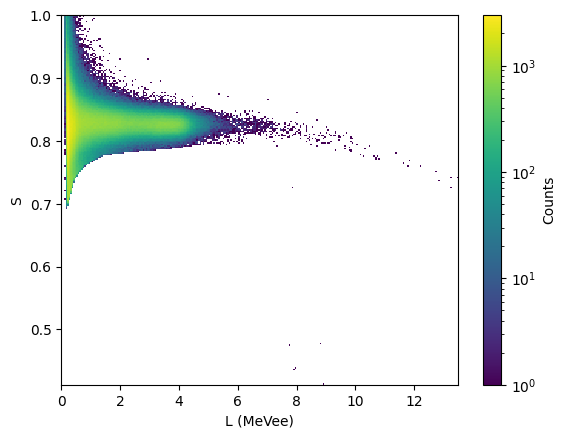

In [13]:
plt.hist2d(gamma_L, gamma_S, [256,256], norm=colors.LogNorm(vmin=1))
plt.xlabel('L (MeVee)')
plt.ylabel('S')
plt.colorbar(label='Counts')
plt.xlim(left=0)
plt.ylim(top=1)
plt.show()

In [17]:
from FoM import FoM

L = np.concatenate((neutron_L, gamma_L))
S = np.concatenate((neutron_S, gamma_S))

FoMs, FoM_edges = FoM(L, S, neutron_L, neutron_S, gamma_L, gamma_S, 0.2, 200, 6)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


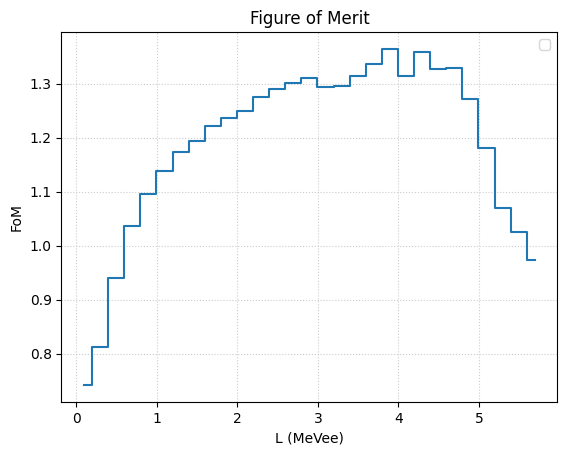

In [20]:
plt.figure()

plt.step(FoM_edges[:-1], FoMs, where='mid')

plt.xlabel('L (MeVee)')
plt.ylabel('FoM')
# plt.yscale('log')

plt.title('Figure of Merit')
plt.legend()
plt.grid(color='#CCCCCC', linestyle=':')
plt.show()

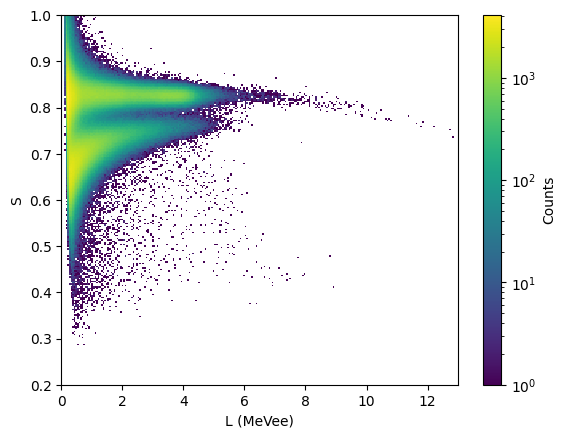

In [21]:
plt.figure()
plt.hist2d(L, S, [256,256], norm=colors.LogNorm(vmin=1))
plt.xlabel('L (MeVee)')
plt.ylabel('S')
plt.ylim(0.2,1)
plt.xlim(0,13)
plt.colorbar(label='Counts')
plt.show()

In [8]:
all_S_hist, all_S_bins = np.histogram(cut_S[cut_L >= 0.1], bins='auto')

# plt.hist(cut_S[cut_L >= 3000], bins='auto')

plt.step(all_S_bins[:-1], all_S_hist)
plt.xlabel('S')
plt.ylabel('Counts')
plt.title('Histogram of PSD parameter S for AmBe source (L >= 0.1)')
plt.show()

# FoM by splitting simply along S value

In [9]:
# Fake splits
split_point_index = np.where(all_S_bins >= 0.61)[0][0]

neutron_fit = curve_fit(gaussian, all_S_bins[:split_point_index], all_S_hist[:split_point_index], [1, 1, 1])
gamma_fit = curve_fit(gaussian, all_S_bins[split_point_index:-1], all_S_hist[split_point_index:], [1, 1, 1])

print(neutron_fit[0])
print(gamma_fit[0])


[5.12587871e-01 5.88560019e-02 1.22787458e+03]
[6.81191514e-01 2.63903350e-02 8.08750117e+02]


In [10]:
FoM = np.abs(gamma_fit[0][0] - neutron_fit[0][0]) / (2.35 * gamma_fit[0][1] + 2.35 * neutron_fit[0][1])
print(f'Figure of Merit: {FoM}')

Figure of Merit: 0.8416341801266856


In [11]:
plt.step(all_S_bins[:-1], all_S_hist, label='data')

plt.plot(all_S_bins[:split_point_index], gaussian(all_S_bins[:split_point_index], *neutron_fit[0]), label='neutron fit')
plt.plot(all_S_bins[split_point_index:-1], gaussian(all_S_bins[split_point_index:-1], *gamma_fit[0]), label='gamma fit')

plt.xlabel('S')
plt.ylabel('Counts')
plt.title(f'Histogram of PSD parameter S for AmBe source (L >= 0.1 MeVee)\nFoM: {FoM:.5f}')
plt.legend()

plt.show()

# FoM splitting them by PSD cuts

In [12]:
gamma_L, gamma_S = dat_file.select_events(L, S, cut_id=[1], inc=[1])
gamma_L = calibration[0] * gamma_L + calibration[1]

In [13]:
gamma_S_hist = np.histogram(gamma_S[gamma_L >= 0.1], bins='auto')

plt.step(gamma_S_hist[1][:-1], gamma_S_hist[0])
plt.show()


In [19]:
neutron_L, neutron_S = dat_file.select_events(L, S, cut_id=[0], inc=[1], visual=True)
neutron_L = calibration[0] * neutron_L + calibration[1]

In [15]:
neutron_S_hist = np.histogram(neutron_S[neutron_L >= 0.1], bins='auto')

plt.step(neutron_S_hist[1][:-1], neutron_S_hist[0])
plt.show()


In [16]:
popt_g, pcov_g = curve_fit(gaussian, gamma_S_hist[1][:-1], gamma_S_hist[0], [1, 1, 1])
popt_n, pcov_n = curve_fit(gaussian, neutron_S_hist[1][:-1], neutron_S_hist[0], [1, 1, 1])

In [17]:
FoM_2 = np.abs(popt_g[0] - popt_n[0]) / (2.35 * popt_g[1] + 2.35 * popt_n[1])
print(f'Figure of Merit: {FoM_2}')

Figure of Merit: 0.9331560611008926


In [18]:
plt.step(gamma_S_hist[1][:-1], gamma_S_hist[0], label='gamma data')
plt.step(neutron_S_hist[1][:-1], neutron_S_hist[0], label='neutron data')

plt.plot(gamma_S_hist[1][:-1], gaussian(gamma_S_hist[1][:-1], *popt_g), label='gamma fit')
plt.plot(neutron_S_hist[1][:-1], gaussian(neutron_S_hist[1][:-1], *popt_n), label='neutron fit')

plt.xlabel('S')
plt.ylabel('Counts')
plt.title(f'Histogram of PSD parameter S for AmBe source (L >= 0.1 MeVee)\nFoM: {FoM_2:.5f}')
plt.legend()

plt.show()



# AmBe neutron L spectrum

In [20]:
plt.figure()
plt.hist(neutron_L, bins='auto', histtype='step')
plt.xlabel('L (MeVee)')
plt.ylabel('Counts')
plt.title('AmBe neutron light output spectrum')
plt.semilogy()
plt.show()